# Spotify Songs Data Analysis 

- Dataset download link - [Download](https://www.kaggle.com/datasets/geomack/spotifyclassification?resource=download)
- Spotify API Docs - [Download](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)
- Used softwares -
     - ![Python_Logo](https://docs.servicestack.net/img/pages/apps/jupyter-python.png) ![spotify](https://logowik.com/content/uploads/images/spotify-black1673.jpg)

## Assements 

- [X] Top 5 most popular artists
- [X] Top 5 loudest tracks
- [X] Artist with the most danceability song
- [X] To 10 instrumentalness tracks
- [X] Co-relation checking between different Columns
    - tempo
    - loudness
    - acousticness
    - danceability
    - duration_ms
    - energy
    - instrumentalness
    - liveness
    - speechiness
    - valence
- [X] Loudness vs Energy Correlation 
- [X] Duration of Songs of Different Artists
- [X] Top 10 energetic tracks
- [X] Most common durations
- [X] Top 10 tracks with the most valence
    

## Python Initialization Part

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DataSet reading and opening part 

In [2]:
#read CSV file
df=pd.read_csv('spotify_data.csv')
#cleaning data
df.drop("Unnamed: 0",axis=1,inplace=True)
#print first five rows using head() function
df.head()
custom_palette = sns.color_palette("autumn", 10)

## DataSet checking and Cleaning part

### Detect and count missing values

In [3]:
#detect and count missing values
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [4]:
#Diplay a concise summary of dataset
df.info()
#Display the number of rows and columns 
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

(2017, 16)

### Display the column headers and its length 

In [5]:
#Display the column headers and its length 
print(df.columns)
len(df.columns)

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


16

### Basic Statistics of the DataSet

In [6]:
#Generating descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000
speechiness,2017.0,0.092664,0.089931,0.023100,0.03750,0.054900,0.108,0.816


## Data Analysis Part

### - Top 5 most popular artists and their graph

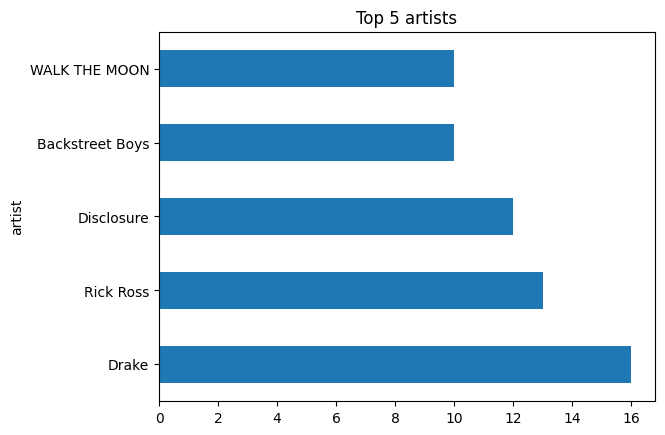

In [7]:
#Top 5 most popular artists and their graph
top_five_artists = df.groupby("artist").count().sort_values(by="song_title", ascending=False) ["song_title"][:5]
top_five_artists
top_five_artists.plot.barh()
plt.title("Top 5 artists")
plt.show()

### - Top 5 loudest tracks

      loudness                                         song_title
1594   -33.097            Lyric Pieces, Book I Op. 12: I. Arietta
1596   -31.367            8 Fantasiestücke, Op.12 : 1. Des Abends
1598   -31.082  Piano Quartet in E flat, Op.47: 3. Andante can...
1531   -30.447          I Was So Young, and You Were So Beautiful
1549   -29.460                                            Eleanor


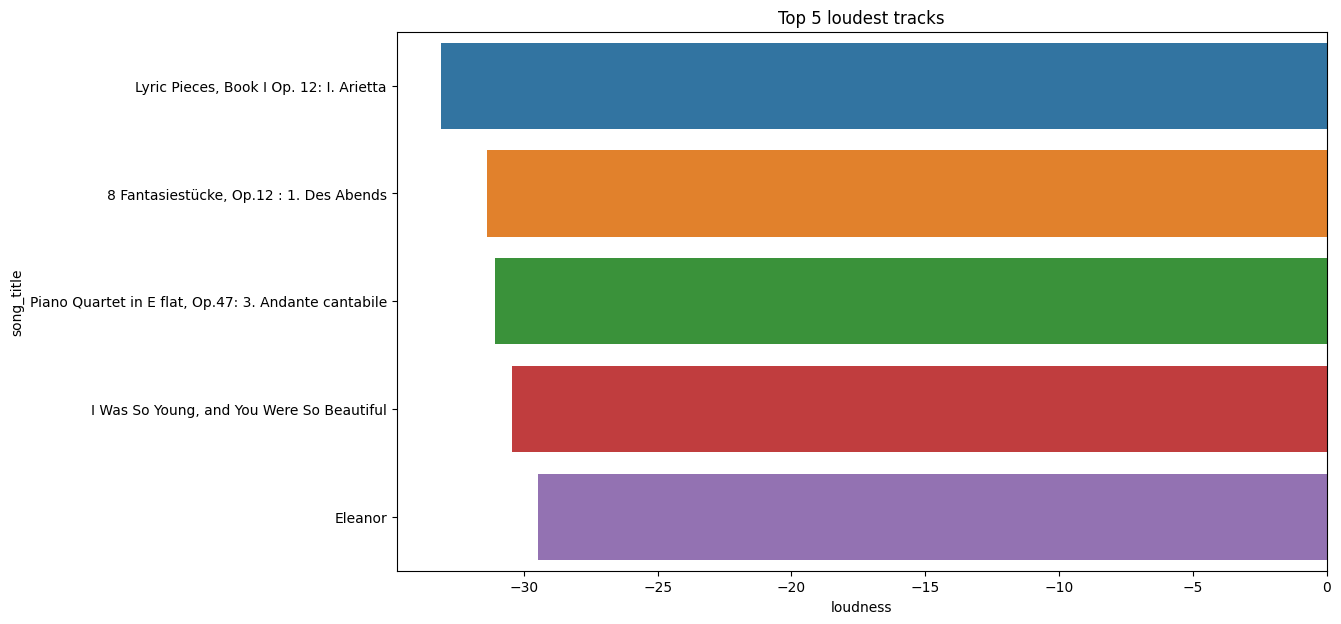

In [8]:
#top 5 loudest tracks
top_five_loudest_tracks = df[["loudness", "song_title"]].sort_values(by="loudness", ascending=True)[:5]
print(top_five_loudest_tracks)
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="song_title", hue= "song_title" , data=top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

### - Artist with the most danceability song

      danceability              song_title             artist
1433         0.984  Flashwind - Radio Edit       Ben Remember
1901         0.967                SexyBack  Justin Timberlake
604          0.962       Check Me Out Like          Blaqstarr
32           0.959             Best Friend         Young Thug
1957         0.959            Ice Ice Baby        Vanilla Ice


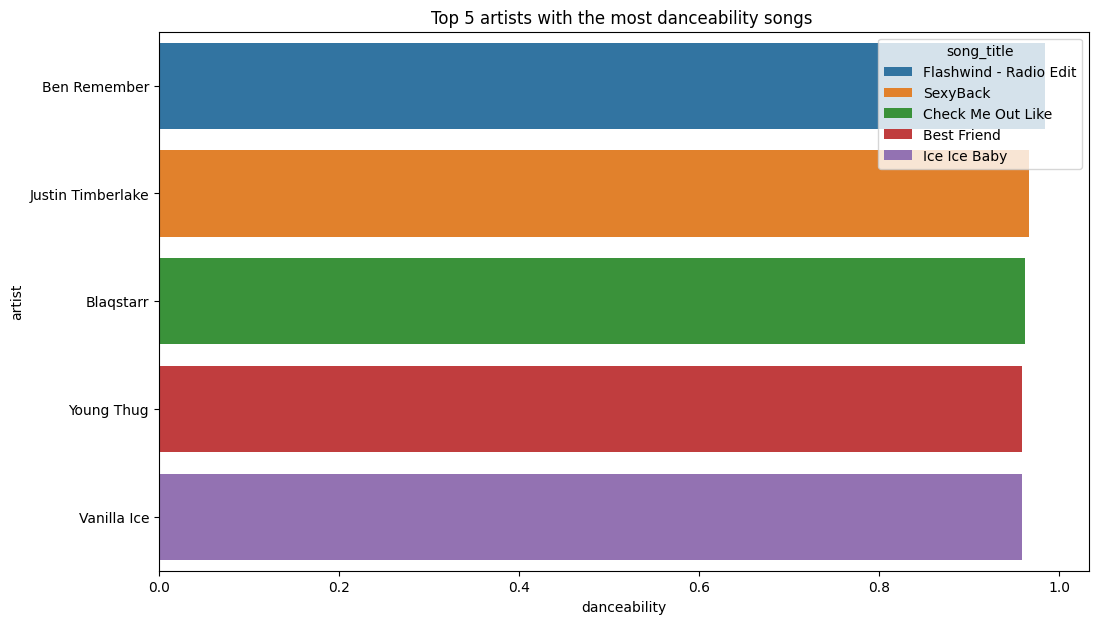

In [9]:
#artist with the most danceability song
top_five_artist_danceability_songs=df[["danceability","song_title", "artist"]].sort_values(by="danceability",ascending=False)[:5]
print(top_five_artist_danceability_songs)
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability", y="artist", hue= "song_title" , data=top_five_artist_danceability_songs)
plt.title("Top 5 artists with the most danceability songs ")
plt.show()

### - Top 10 instrumental tracks

      instrumentalness                            song_title  \
1313             0.976                       Senseless Order   
271              0.968  So Destroyed (channeling Rage Peace)   
1575             0.964             A Hundred Dreams from Now   
1619             0.958                                 Raven   
725              0.957                     Strandbar (disko)   
1546             0.956                        Almas vaggvisa   
1322             0.955                            Pitchblack   
1349             0.954                       Prismatic Abyss   
1661             0.954                               Yebisah   
121              0.952                        Chasing Heaven   

                        artist  
1313        Signs of the Swarm  
271                Prince Rama  
1575                Ray Bryant  
1619             John Dahlbäck  
725                 Todd Terje  
1546         Jan Lundgren Trio  
1322  Walking Dead On Broadway  
1349           Aversions Crown 

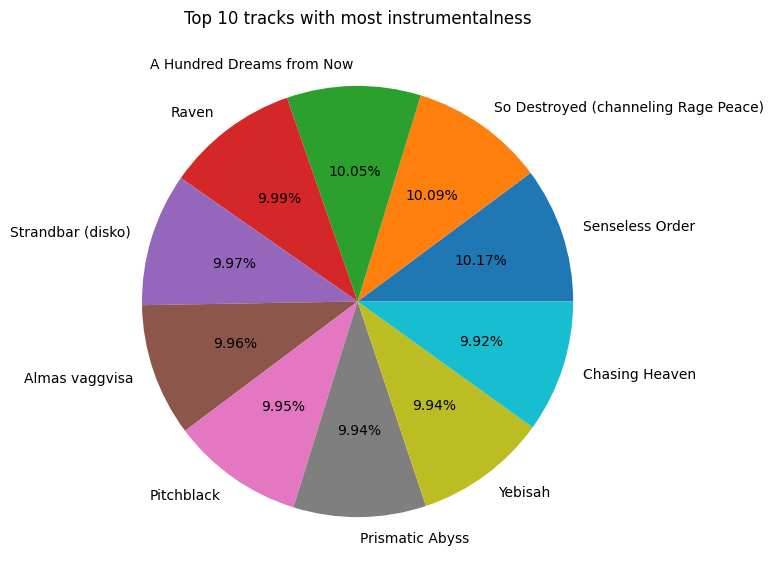

In [10]:
#top 10 instrumental tracks
top_ten_instrumental_tracks = df[["instrumentalness", "song_title","artist"]].sort_values(by="instrumentalness", ascending=False)[:10]
print(top_ten_instrumental_tracks)
plt.figure(figsize=(12, 7))
# sns.barplot(x="instrumentalness", y="song_title", data=top_ten_instrumental_tracks)
plt.pie(x="instrumentalness", data=top_ten_instrumental_tracks , autopct = '%1.2f%%' , labels=top_ten_instrumental_tracks.song_title)
plt.title("Top 10 tracks with most instrumentalness")
plt.show()

### - Co-relation checking between different Columns

[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'duration_ms'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'time_signature'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'target')]

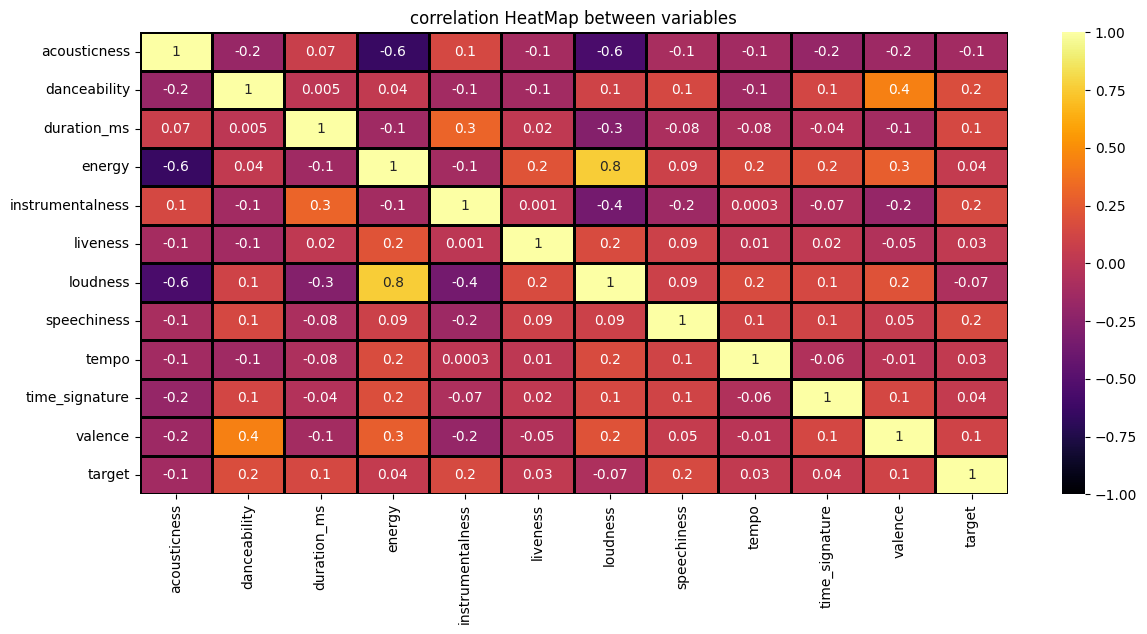

In [11]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]
#visualization map:correlation map
corr_df=df_numeric.drop(["key","mode"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1,linecolor="Black")
heatmap.set_title("correlation HeatMap between variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

### - Loudness vs Energy Correlation

100


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

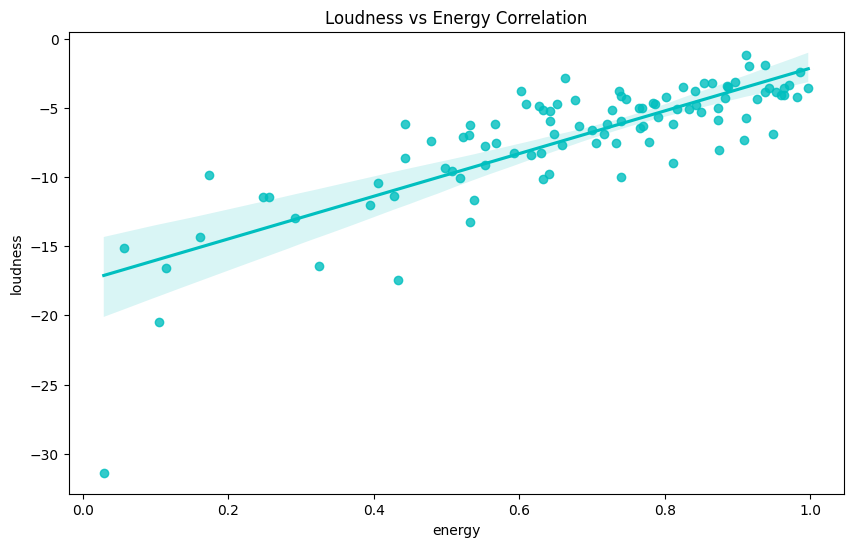

In [12]:
#sampling only 50 percent of the actual data set
sample_df= df.sample(int(0.050*len(df)))
print(len(sample_df))
#creating a regressin plot between loudness and energy
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y= "loudness", x = "energy", color= "c").set(title ="Loudness vs Energy Correlation")

### - Duration of Songs of Different Artists

Text(0, 0.5, 'Artist')

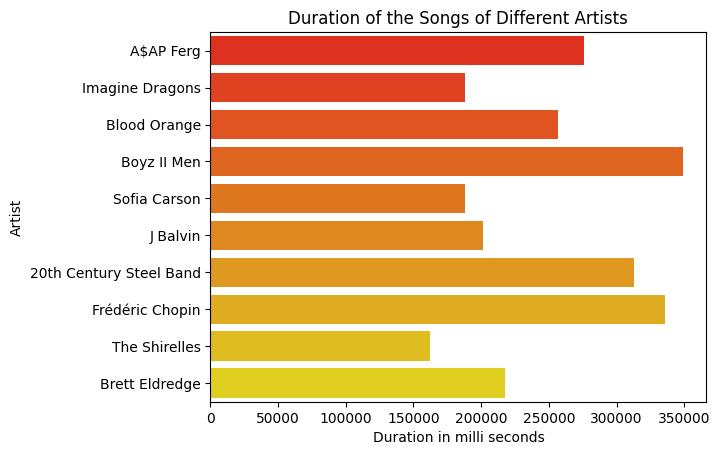

In [17]:
#plotting duration of the songs w.r.t different artists using a horizontal barplot
sample_df= df.sample(int(0.005*len(df)))
plt.title("Duration of the Songs of Different Artists") 
sns.barplot(y='artist', x='duration_ms', palette= custom_palette, hue='artist', data =sample_df)
plt.xlabel("Duration in milli seconds") 
plt.ylabel("Artist")

### - Top 10 energetic tracks

      energy         song_title
1299   0.998      No Absolution
1322   0.997         Pitchblack
1297   0.994  A Darkened Gospel
1347   0.993         Unanswered
2015   0.992      First Contact


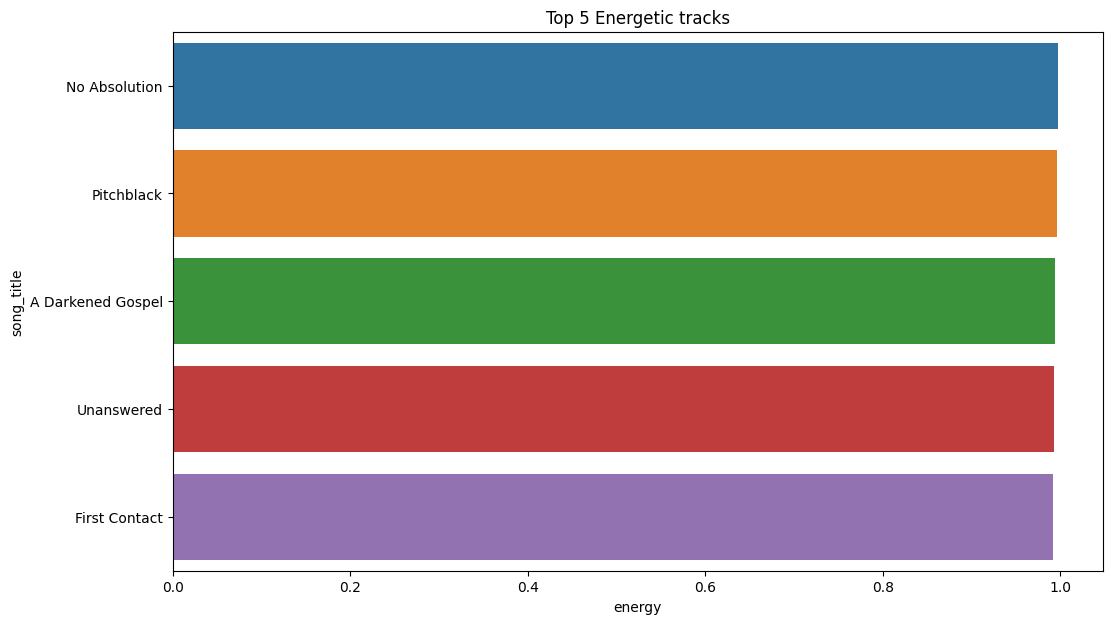

In [14]:
#top 5 energetic tracks
top_five_energetic_tracks = df[["energy", "song_title"]].sort_values(by="energy", ascending=False)[:5]
print(top_five_energetic_tracks)
plt.figure(figsize=(12, 7))
sns.barplot(x="energy", y="song_title", hue="song_title",data=top_five_energetic_tracks)
plt.title("Top 5 Energetic tracks")
plt.show()

### - Most common Duration of Songs

In [15]:
#most common durations 
duration_counts = df['duration_ms'].value_counts()
# Get the most common duration(s)
most_common_duration = duration_counts.idxmax()
common_duration_count = duration_counts.max()

print("Most common duration:", most_common_duration)
print("Count:", common_duration_count)

Most common duration: 192000
Count: 5


### - Top 10 tracks with the most valence

      valence                                         song_title
460     0.992                             Abataka - Original Mix
912     0.975                I'm Walkin' - 2002 Digital Remaster
1966    0.974        To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)
207     0.973                                        Look at You
48      0.973                              Azon de ma gnin kpevi
337     0.972  Let's Lovedance Tonight - Danny Krivit Re-edit...
1590    0.972                                   Jelly On A Plate
838     0.971  Let's Lovedance Tonight - Danny Krivit Re-edit...
497     0.968                               Mi Swing es Tropical
112     0.967                                 Please Mr. Postman


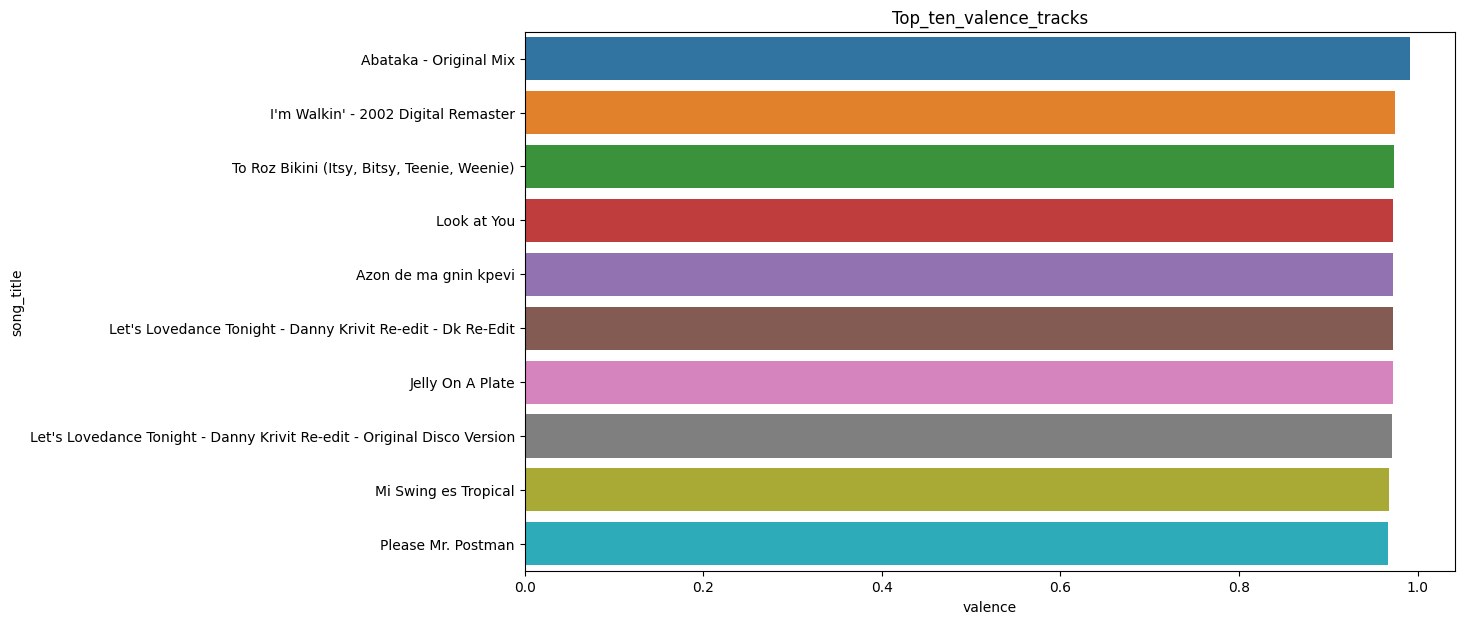

In [16]:
#Top 10 tracks with the most valence
top_ten_valence_tracks = df[["valence", "song_title"]].sort_values(by="valence", ascending=False)[:10]
print(top_ten_valence_tracks)
plt.figure(figsize=(12, 7))
sns.barplot(x="valence", y="song_title", hue="song_title",data=top_ten_valence_tracks)
plt.title("Top_ten_valence_tracks")
plt.show()